# 6.5 U.S.A Real Estate - Machine learning - Clustering - NK

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. Data Cleaning/PreProcessing
#### 3. The elbow technique
#### 4.. k-means clustering

### 1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/nancykray/Desktop/Real Estate Project'

In [4]:
df = pd.read_pickle(os.path.join(path,'Prepared Data', 'df_clean6.pkl'))

In [5]:
df.shape

(2217918, 13)

In [6]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Price category
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.000,0,Middle price
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.000,0,Low price
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.000,0,Low price
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.000,0,Middle price
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,2715.133,0,Low price


### 2. Data Cleaning
Preprocessing data to remove categorical variables

In [7]:
# drop columns with categorical variables (non-numeric)

df_1= df.select_dtypes(include=[np.number])

In [8]:
# Check columns
df_1.columns

Index(['brokered_by', 'price', 'bed', 'bath', 'acre_lot', 'street', 'zip_code',
       'house_size'],
      dtype='object')

In [9]:
df_1.shape # dropped 5 columns: status, city, state, prev_sold_date, and price category

(2217918, 8)

In [10]:
# take out 4 more columns since we also do not need brokered_by, street, prev_sold_date, or zip_code

var_to_include = ['price', 'bed', 'bath', 'acre_lot', 'house_size']

In [11]:
df_2 = df_1[var_to_include]

In [12]:
#check dataframe columns
df_2.columns

Index(['price', 'bed', 'bath', 'acre_lot', 'house_size'], dtype='object')

In [13]:
df_2.shape # now we are working with 5 relevant columns, all numeric

(2217918, 5)

### 2. The elbow technique

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
score = [kmeans[i].fit(df_2).score(df_2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

[-3.9568376233052006e+18,
 -2.594622423366699e+18,
 -1.5122569672230006e+18,
 -8.881576353030758e+17,
 -5.845700538396594e+17,
 -4.073009900638903e+17,
 -2.977615367048797e+17,
 -2.221122628707377e+17,
 -1.7106825676610707e+17]

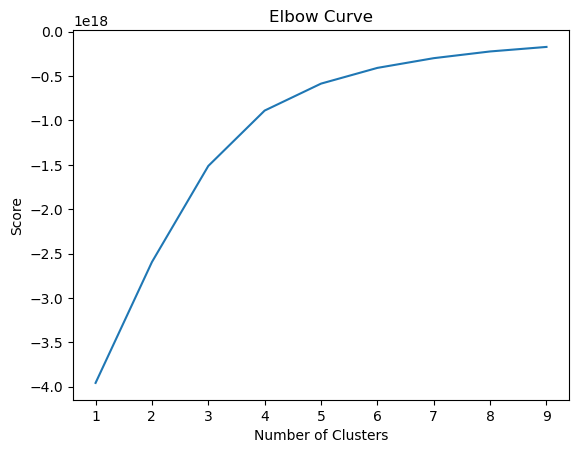

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.savefig('elbow_curve_4.png')
pl.show()

#####  In this example, there's a jump from three to four on the x-axis, but after that, the curve straightens out with a very slight incine This means that the optimal count for your clusters is four

### 3. k-means clustering

In [17]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 


In [18]:
# Fit the k-means object to the data.

kmeans.fit(df_2)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [19]:
df_2['clusters'] = kmeans.fit_predict(df_2)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_32839/1948498210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['clusters'] = kmeans.fit_predict(df_2)


In [20]:
df_2.head() # check that the new 'clusters' column is there

,price,bed,bath,acre_lot,house_size,clusters
0,105000.0,3.0,2.0,0.12,920.000,0
1,80000.0,4.0,2.0,0.08,1527.000,0
2,67000.0,2.0,1.0,0.15,748.000,0
3,145000.0,4.0,2.0,0.10,1800.000,0
4,65000.0,6.0,2.0,0.05,2715.133,0


In [21]:
df_2['clusters'].value_counts()

clusters
0    2164936
1      50728
3       2253
2          1
Name: count, dtype: int64

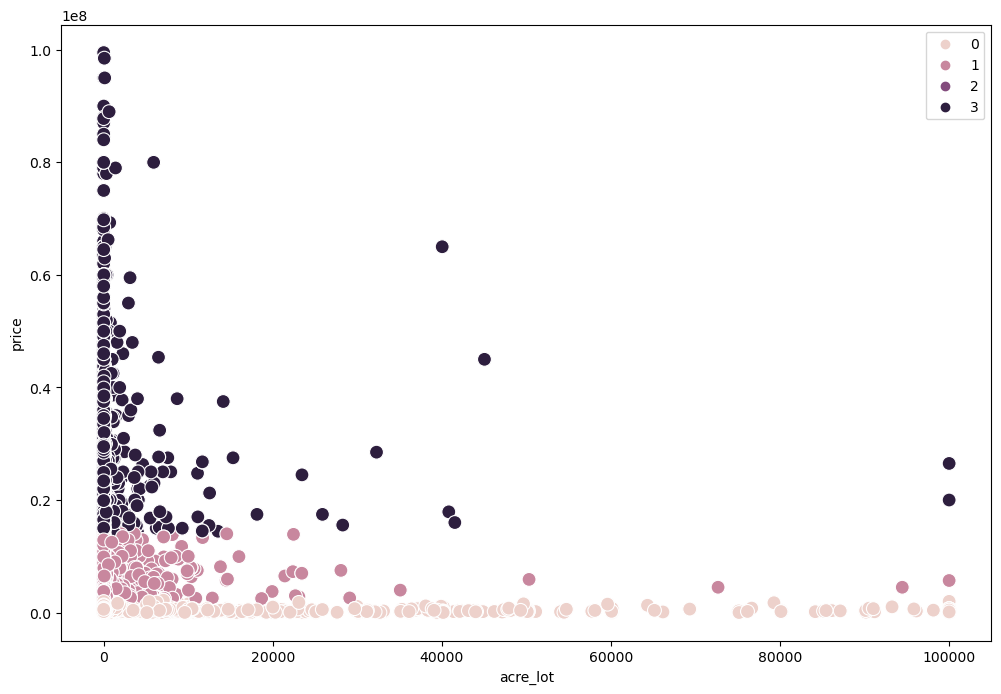

In [22]:
# Plot the clusters for the "price" and "acre_lot" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['acre_lot'], y=df_2['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('acre_lot') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.savefig('clusters_acre_price.png')
plt.show()

##### The clusters can be interpreted meaningfully in the context size of price per acre lot.
##### Cluster 0 represents lower priced hommoderate priced homes.
##### Cluster 1 represents high priced homes
##### Cluster 2 represents very high priced homes

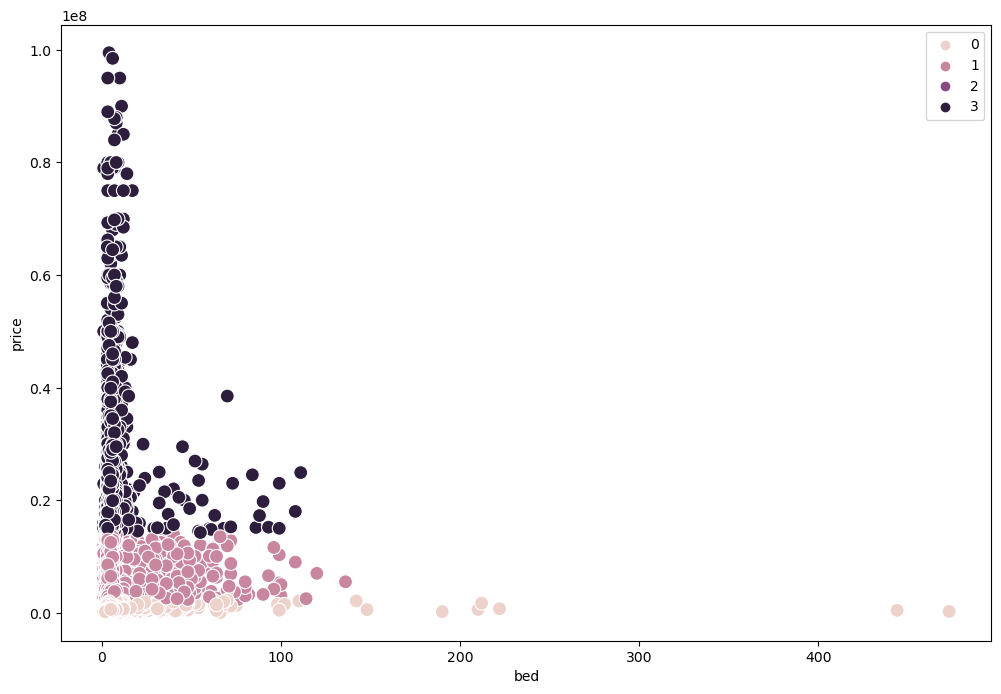

In [25]:
# Plot the clusters for the "bed" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['bed'], y=df_2['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('bed') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.savefig('clusters_bed_price_3')
plt.show()

##### The clusters can be interpreted meaningfully in the context of size of price and number of bedrooms in the home.
##### Cluster 0 represents lower priced hommoderate priced homes.
##### Cluster 1 represents high priced homes
##### Cluster 2 represents very high priced homes

In [34]:
df_2['house_size'].mean()

2716.077224616059

In [35]:
df_2['house_size'].median()

2160.0

In [36]:
df_2['house_size'].max()

1040400400.0

In [37]:
df_2['house_size'].min()

4.0

In [55]:
df_house=df_2[df_2['house_size']>100000000.0]

In [60]:
df_house['house_size'].value_counts

<bound method IndexOpsMixin.value_counts of 1212556    1.040400e+09
Name: house_size, dtype: float64>

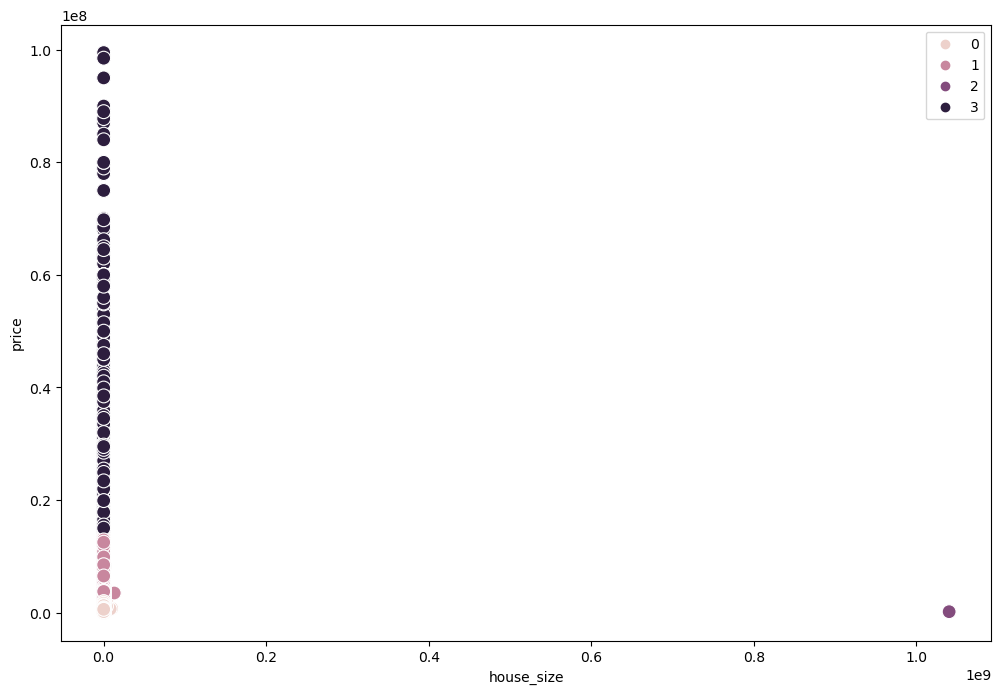

In [26]:
# Plot the clusters for the "house_size" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['house_size'], y=df_2['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('house_size') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.savefig('clusters_house_size_price_outliers.png')
plt.show()

##### This shows that cluster 3 has outliers with huge house sizes.  Investigation below shows that there are 12 houses that are above 1million square feet.   It seems as though these outliers can be removed, however with further investigation below, it looks as though taking these extremes out don't affect the mean or median too much.  This chart is decieving for looking at this variable of 'house_size'  

In [27]:
df_house_2 =df_2[df_2['house_size']>1000000.0] #weed out the houses over 1 million square feet

In [28]:
df_house_2.shape # we can see that 12 houses are over 1 million square feet

(12, 6)

In [29]:
# Let's investigate to see if its worth cleaning these outliers 
# and then try this again using a modified df including only those below this
df_house_3 =df_2[df_2['house_size']<1000000.0]

In [30]:
df_house_3['house_size'].mean()

2226.4430773287972

In [31]:
df_house_3['house_size'].median()

2160.0

In [32]:
df_house_3['house_size'].max()

958320.0

#### note: this new dataframe with these extremes removed still show a similar mean and median.  This chart is not showing a good picture of what is going on here. 

In [33]:
# Descriptive stats for clusters
cluster_stats = df_2.groupby('clusters').agg(['count', 'mean', 'std', 'min', 'max'])
print(cluster_stats)

            price                                                      \
            count          mean           std         min         max   
clusters                                                                
0         2164936  4.085885e+05  3.691294e+05         1.0   2325996.0   
1           50728  4.243094e+06  2.225590e+06   2326740.0  14195000.0   
2               1  1.600000e+05           NaN    160000.0    160000.0   
3            2253  2.413592e+07  1.230908e+07  14200000.0  99500000.0   

              bed                                            ... acre_lot  \
            count      mean       std       min         max  ...    count   
clusters                                                     ...            
0         2164936  3.243734  1.238490  1.000000  473.000000  ...  2164936   
1           50728  4.532928  3.714023  1.000000  136.000000  ...    50728   
2               1  3.275919       NaN  3.275919    3.275919  ...        1   
3            2253  6.30633

#### Interpretation of Descriptive Statistics:
#### Variability and Spread: The standard deviation values indicate that there is considerable variability within clusters, making this data hard to interpret.  The only variable with lower SD is 'bed', as clusters 0 has SD of 1.23 and cluster 1 has SD of 3.68


#### The k-means clustering analysis can be useful in multiple future steps in an analytics pipeline. By using clusters, it highlights certain trends within trends and creates a useful context for insights.  This is a clear visualization for communicating these insights for companies to learn how to make informed decisions and marketing strategies.
